In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
predictions_path = 'trading_predictions.csv'  # Ensure this file was generated by previous LSTM code
df_preds = pd.read_csv(predictions_path, index_col='date', parse_dates=True)
print("Loaded predicted prices:")
print(df_preds.head())

# Check we have multiple days and multiple tickers
tickers = df_preds.columns.tolist()
print("\nTickers:", tickers)

Data Sample:


,C,CLX,BIIB,HAL,PANW,TSLA,F,CBOE,TRMB,NRG,...,RMD,PCAR,AEE,NUE,CHTR,HWM,TJX,TMO,HIG,GNRC
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,0.009,0.001,0.009,-0.004,-0.006,-0.002,-0.006,0.002,0.003,0.005,...,-0.000,-0.001,0.004,-0.004,0.003,0.002,0.004,0.003,0.001,-0.000
2024-01-03,0.011,0.001,0.003,0.000,-0.007,-0.005,-0.018,0.001,-0.000,0.005,...,-0.005,-0.006,0.004,-0.001,0.001,-0.000,0.002,0.004,0.002,-0.005
2024-01-04,0.011,0.001,-0.001,-0.005,-0.008,-0.008,-0.015,-0.000,-0.003,0.003,...,-0.005,-0.008,0.003,-0.005,-0.004,-0.002,0.001,0.002,0.002,-0.011
2024-01-05,0.011,0.001,-0.004,-0.003,-0.007,-0.006,-0.006,-0.000,-0.003,0.004,...,-0.005,-0.008,0.003,-0.008,-0.006,0.000,0.001,0.003,0.004,-0.011
2024-01-08,0.007,0.000,-0.004,-0.008,-0.005,-0.008,0.002,-0.001,-0.004,0.004,...,-0.000,-0.001,0.004,-0.004,-0.005,0.000,0.001,0.002,0.004,-0.011


Number of stocks: 499
Number of days: 19


In [3]:
# We'll compute log returns or simple returns. Here, let's do simple daily returns:
# return_t = (price_t - price_(t-1)) / price_(t-1)
df_returns = df_preds.pct_change().dropna()
print("\nDaily predicted returns:")
print(df_returns.head())

Expected returns shape: (499,)


In [4]:
expected_returns = df_returns.mean()  # mean daily return
covariance = df_returns.cov()         # covariance matrix of returns

print("\nExpected Returns:")
print(expected_returns.head())
print("\nCovariance Matrix:")
print(covariance.iloc[:5, :5])

GA completed.
Best fitness found: 0.0011797739948606622


In [5]:
signals_path = 'trading_signals.csv'
try:
    df_signals = pd.read_csv(signals_path, index_col='date', parse_dates=True)
    # Count how many 'buy' signals each ticker had in January
    buy_counts = (df_signals == 'buy').sum()
    # For example, only consider tickers with > 5 buy signals (this is arbitrary)
    selected_tickers = buy_counts[buy_counts > 5].index.tolist()
    # Ensure these tickers are in our predictions as well
    selected_tickers = [t for t in selected_tickers if t in tickers]

    if len(selected_tickers) > 0:
        print("\nTickers selected by signals:", selected_tickers)
        # Filter expected_returns and covariance to these tickers
        expected_returns = expected_returns[selected_tickers]
        covariance = covariance.loc[selected_tickers, selected_tickers]
    else:
        print("No tickers passed signal filter. Using all tickers.")
except FileNotFoundError:
    print("\nNo trading_signals.csv found. Proceeding without signal filtering.")

Best portfolio weights:
C: 0.0000
CLX: 0.0013
BIIB: 0.0001
HAL: 0.0049
PANW: 0.0002
TSLA: 0.0000
F: 0.0000
CBOE: 0.0093
TRMB: 0.0044
NRG: 0.0092
IDXX: 0.0040
GE: 0.0001
ULTA: 0.0019
ADM: 0.0000
SYK: 0.0000
MOH: 0.0009
OTIS: 0.0014
PODD: 0.0055
XOM: 0.0030
PNC: 0.0016
TXN: 0.0020
DAY: 0.0000
BKR: 0.0000
KMB: 0.0028
ROK: 0.0000
PFG: 0.0000
HD: 0.0053
CPAY: 0.0040
CFG: 0.0064
VMC: 0.0000
DE: 0.0000
SJM: 0.0077
VTRS: 0.0081
MRNA: 0.0084
ABT: 0.0041
HRL: 0.0000
IVZ: 0.0007
COF: 0.0072
SMCI: 0.0089
LKQ: 0.0018
AXP: 0.0000
AMT: 0.0000
ISRG: 0.0132
WDC: 0.0014
KHC: 0.0103
ANET: 0.0096
IR: 0.0004
ICE: 0.0093
UDR: 0.0000
APD: 0.0000
KEYS: 0.0054
V: 0.0006
ANSS: 0.0000
SPG: 0.0000
CI: 0.0000
PEG: 0.0019
VRSN: 0.0000
RF: 0.0000
SHW: 0.0000
MNST: 0.0105
AMGN: 0.0000
JPM: 0.0000
BRK-B: 0.0042
PEP: 0.0091
HPE: 0.0000
SBUX: 0.0042
CTLT: 0.0043
EW: 0.0009
CSX: 0.0037
MKTX: 0.0038
EOG: 0.0036
WYNN: 0.0102
PNW: 0.0000
RSG: 0.0075
EIX: 0.0028
HLT: 0.0000
NCLH: 0.0000
EVRG: 0.0000
ACGL: 0.0105
NVDA: 0.0078

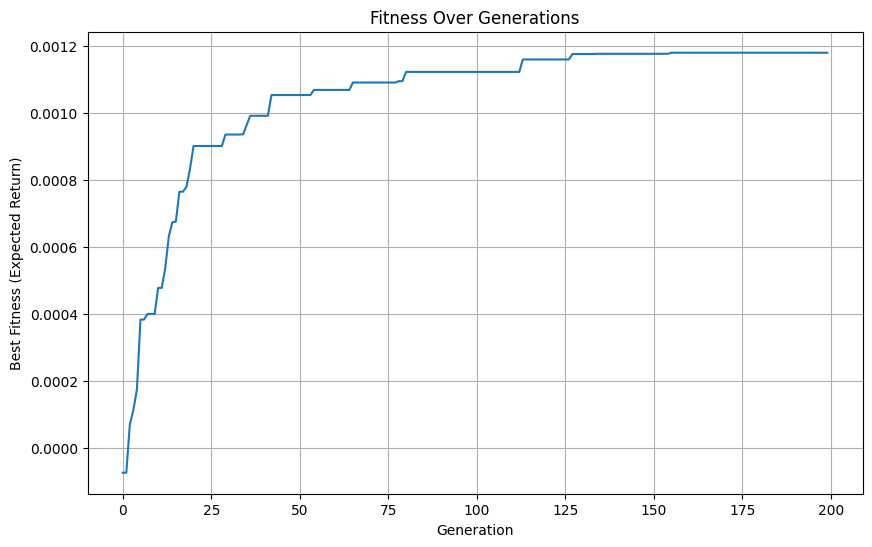

In [6]:
# Objective: Maximize Sharpe ratio = mean_return / volatility
# mean_return = sum(weights * expected_returns)
# volatility = sqrt(weights^T * covariance * weights)

# GA Parameters
POP_SIZE = 100
N_GENERATIONS = 200
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8
ELITISM = True

returns_array = expected_returns.values
n_stocks = len(returns_array)

def portfolio_performance(weights, returns, cov):
    port_return = np.sum(weights * returns)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
    # Sharpe ratio with zero risk-free rate:
    sharpe = port_return / (port_vol + 1e-9)  # Add small number to avoid division by zero
    return port_return, port_vol, sharpe

def fitness_function(individual):
    # individual: array of weights
    _, _, sharpe = portfolio_performance(individual, returns_array, covariance)
    return sharpe

def initialize_population(pop_size, n_assets):
    population = np.random.random((pop_size, n_assets))
    population = population / population.sum(axis=1, keepdims=True)
    return population

def selection(population, fitness_scores):
    # Roulette Wheel Selection
    total_fitness = np.sum(fitness_scores)
    pick = random.random() * total_fitness
    current = 0.0
    for i, f in enumerate(fitness_scores):
        current += f
        if current > pick:
            return population[i]
    return population[-1]

def crossover(parent1, parent2):
    if random.random() < CROSSOVER_RATE:
        point = np.random.randint(1, n_stocks - 1)
        child1 = np.concatenate([parent1[:point], parent2[point:]])
        child2 = np.concatenate([parent2[:point], parent1[point:]])
    else:
        child1, child2 = parent1.copy(), parent2.copy()
    # Normalize
    child1 = child1 / child1.sum()
    child2 = child2 / child2.sum()
    return child1, child2

def mutate(individual):
    for i in range(n_stocks):
        if random.random() < MUTATION_RATE:
            individual[i] += np.random.uniform(-0.01, 0.01)
    # no negative weights
    individual[individual < 0] = 0.0
    # renormalize
    individual = individual / individual.sum()
    return individual

# Initialize population
population = initialize_population(POP_SIZE, n_stocks)
best_solution = None
best_fitness = -np.inf
fitness_over_time = []

for gen in range(N_GENERATIONS):
    fitness_scores = np.array([fitness_function(ind) for ind in population])
    gen_best_fitness = np.max(fitness_scores)
    gen_best_ind = population[np.argmax(fitness_scores)]

    if gen_best_fitness > best_fitness:
        best_fitness = gen_best_fitness
        best_solution = gen_best_ind.copy()

    fitness_over_time.append(best_fitness)

    new_population = []
    if ELITISM:
        new_population.append(best_solution)

    while len(new_population) < POP_SIZE:
        parent1 = selection(population, fitness_scores)
        parent2 = selection(population, fitness_scores)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.append(child1)
        if len(new_population) < POP_SIZE:
            new_population.append(child2)

    population = np.array(new_population)

print("\nGA optimization completed.")
print("Best Sharpe ratio found:", best_fitness)

best_port_return, best_port_vol, best_sharpe = portfolio_performance(best_solution, returns_array, covariance)
print("Best portfolio expected return:", best_port_return)
print("Best portfolio volatility:", best_port_vol)
print("Best portfolio Sharpe ratio:", best_sharpe)

print("\nBest portfolio weights:")
for symbol, weight in zip(expected_returns.index, best_solution):
    print(f"{symbol}: {weight:.4f}")

In [ ]:
# Compare if we just picked stocks based on signals without optimization:
# For example, a naive approach: equally weight all "buy-signal" stocks.
# (Only valid if we applied a signal filter above.)
# If we had filtered tickers by signals, we could do:
# if 'selected_tickers' in locals() and len(selected_tickers) > 0:
#     naive_weights = np.ones(len(selected_tickers)) / len(selected_tickers)
#     naive_returns = expected_returns[selected_tickers].mean()  # mean of their mean returns
#     naive_vol = np.sqrt(np.dot(naive_weights.T, np.dot(covariance.loc[selected_tickers, selected_tickers], naive_weights)))
#     naive_sharpe = naive_returns / naive_vol
#     print("\nNaive equal-weight portfolio on signal-selected tickers:")
#     print("Return:", naive_returns, "Volatility:", naive_vol, "Sharpe:", naive_sharpe)

# You could also test a scenario with all tickers equally weighted for baseline comparison.
eq_weights = np.ones(n_stocks) / n_stocks
eq_ret, eq_vol, eq_sharpe = portfolio_performance(eq_weights, returns_array, covariance)
print("\nEqual-weight portfolio (all tickers) Sharpe:", eq_sharpe)

# Compare best GA solution to the equal-weight solution:
improvement = (best_sharpe - eq_sharpe) / abs(eq_sharpe) * 100 if eq_sharpe != 0 else np.inf
print("Percentage improvement over equal-weight portfolio:", improvement, "%")

# Optional: plot fitness over time
plt.figure(figsize=(10,6))
plt.plot(fitness_over_time)
plt.title("Fitness (Sharpe Ratio) Over Generations")
plt.xlabel("Generation")
plt.ylabel("Best Sharpe Ratio")
plt.grid(True)
plt.show()